# Assignment 6

### 1.复习上课内容以及复现课程代码

In [41]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os
/
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x  #gpu
except Exception:
  pass
import tensorflow as tf

import cProfile

In [42]:
a = tf.constant([[1,2],
                 [3,4]])
print(a)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


In [43]:
#Broadcasting 
b = tf.add(a,1)
print(b)

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)


In [44]:
#element-wise multiplication
print(a*b) 

tf.Tensor(
[[ 2  6]
 [12 20]], shape=(2, 2), dtype=int32)


In [45]:
print(tf.matmul(a,b))

tf.Tensor(
[[10 13]
 [22 29]], shape=(2, 2), dtype=int32)


In [46]:
import numpy as np

In [47]:
c = np.multiply(a,b)
print(c)

[[ 2  6]
 [12 20]]


In [48]:
#Transfer a tensor to numpy array
print(a.numpy())

[[1 2]
 [3 4]]


In [49]:
w = tf.Variable([[1.0]])
with tf.GradientTape() as tape:
    loss = w * w
grad = tape.gradient(loss,w)
print(grad)

tf.Tensor([[2.]], shape=(1, 1), dtype=float32)


In [62]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train[:10000,:,:]
y_train = y_train[:10000]
x_test = x_test[:1000,:,:]
y_test = y_test[:1000]

In [63]:
x_train = tf.cast(x_train[...,tf.newaxis]/255, tf.float32),
x_test = tf.cast(x_test[...,tf.newaxis]/255, tf.float32),

y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

In [52]:
mnist_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,[3,3],activation='relu',
                          input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(64,[3,3],activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10,activation="softmax")
])

In [53]:
mnist_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_17 (Dropout)         (None, 128)              

In [54]:
#Build the model using Model
inputs = tf.keras.Input(shape=(None,None,1),name="digits")
conv_1 = tf.keras.layers.Conv2D(16,[3,3],activation="relu")(inputs)
conv_2 = tf.keras.layers.Conv2D(16,[3,3],activation="relu")(conv_1)
ave_pool = tf.keras.layers.GlobalAveragePooling2D()(conv_2)
outputs = tf.keras.layers.Dense(10)(ave_pool)
mnist_model_2 = tf.keras.Model(inputs=inputs,outputs=outputs)

In [55]:
mnist_model_2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
digits (InputLayer)          [(None, None, None, 1)]   0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, None, None, 16)    160       
_________________________________________________________________
conv2d_39 (Conv2D)           (None, None, None, 16)    2320      
_________________________________________________________________
global_average_pooling2d (Gl (None, 16)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                170       
Total params: 2,650
Trainable params: 2,650
Non-trainable params: 0
_________________________________________________________________


In [56]:
mnist_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
                    validation_split=0.1,shuffle=True,
                   loss = tf.keras.losses.categorical_crossentropy,
                   metrics = ["accuracy"])

In [57]:
mnist_model_2.compile(loss = tf.keras.losses.categorical_crossentropy,
                      optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

In [58]:
mnist_model.fit(x_train,y_train,batch_size=128,epochs=3)

Train on 10000 samples
Epoch 1/3
10000/10000 [==============================] - 26s 3ms/sample - loss: 2.3014 - accuracy: 0.1085
Epoch 2/3
10000/10000 [==============================] - 24s 2ms/sample - loss: 2.2883 - accuracy: 0.1415
Epoch 3/3
10000/10000 [==============================] - 24s 2ms/sample - loss: 2.2769 - accuracy: 0.1704


In [64]:
mnist_model.evaluate(x_test,y_test)

1000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[2.2670336418151855, 0.303]

In [65]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train[:10000,:,:]
y_train = y_train[:10000]
x_test = x_test[:1000,:,:]
y_test = y_test[:1000]

In [66]:
dataset = tf.data.Dataset.from_tensor_slices(
(tf.cast(x_train[...,tf.newaxis]/255, tf.float32),
 tf.cast(y_train,tf.int64)))
dataset = dataset.shuffle(1000).batch(32)

In [67]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_history = []

In [68]:
for epoch in range(5):
    
    for (batch, (images,labels)) in enumerate (dataset):
        
        with tf.GradientTape() as tape:
            
            logits = mnist_model(images,training=True)
            loss_value = loss(labels,logits)
            
        grads = tape.gradient(loss_value,mnist_model.trainable_variables)
        optimizer.apply_gradients(zip(grads,mnist_model.trainable_variables))
        
    print("Epoch {} finishted".format(epoch))
    

Epoch 0 finishted
Epoch 1 finishted
Epoch 2 finishted
Epoch 3 finishted
Epoch 4 finishted


### 2.回答以下理论题目?

#### 1. Compared to FNN, what is the biggest advantage of CNN?

#### CNN具有更少的参数

#### 2. Suppose your input is a 100 by 100 gray image, and you use a convolutional layer with 50 filters that are each 5x5. How many parameters does this hidden layer have (including the bias parameters)? 

5*5*50+1 = 1251

#### 3. What are "local invariant" and "parameter sharing" ?

#### local invariant: 图像里的目标不管被移动到图片的哪个位置, 最终得到的结果都是相同的。

#### parameter sharing: 权重共享即为filter值共享, filter按照相应的stride的值进行移动, 进行相应的卷积操作。 

#### 4. Why we use batch normalization ?

#### 做batch normalization也是为了后向传播参数的更新, 更新势必会牵扯到梯度的应用, 在不同的激活函数中, 数值越大或数值越小相应的参数梯度越接近于零或无限大, 这样不利用参数的更新, 如果应用betch normalization能将数值集中在一定的范围内，使相应的梯度不至于出现梯度消失、梯度爆炸的情况。

#### 5. What problem does dropout try to solve ?

#### dropout主要是去结果模型过拟合问题, 当参数过多, 数据量少的情况下很容易过拟合, 因此dropout就应用于模型过拟合上面。

#### 6.  Is the following statement correct and why ? "Because pooling layers do not have parameters, they do not affect  the backpropagation(derivatives) calculation"

#### 我觉得是不对的, 前向pooling是一种downsample操作, 虽没有参数, 但也起到降维的作用, 而后向传播其实就是一种upsample操作, 里面涉及到相应的数值填充过程, 使用不同的pooling方法势必会影响相应upsample填充方式, 很显而易见连相应的数值都改变了, 其相应的导数计算也会相应的改变

### 3. 实践题

#### 3.1 In the first session of the practical part, you will implement an image classification model using any deep learning libraries that you are familiar with,  which means, except for tensorflow and keras, you can also use pytorch/caffe/... .  The dataset used in this session is the cifar10 which contains 50000 color (RGB) images, each with size 32x32x3.  All 50000 images are classified into ten categories. 

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

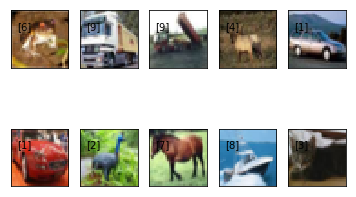

In [3]:
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(x_train[i-1])
    plt.text(3,10,str(y_train[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

#### 我的思路：从基本神经网络结构(初步想到VGG模型, 因为它都是一些相同的模块累积而成的)来逐步构建模型, 最终通过相应的结果画出相应的结果图, 通过结果图来观察整个模型在test上的准确度和模型是否过拟合, 这样有助于模型的进一步改进。

#### 所有模块都封装好相应的功能, 各个函数各司其职。

In [9]:
# 数据加载
def dataset_load():
    (x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    return x_train, y_train, x_test, y_test


In [10]:
# 数据处理  将像素值(0~255)转成较小数值
def dataset_scale(x_train, x_test):
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0

    return x_train, x_test


In [11]:
# 只使用一层  W使用截断正态分布(经验使然)  优化使用了Adam方法！
def mode_define():
    model = models.Sequential()
    model.add(layers.Conv2D(32,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal', input_shape = (32, 32, 3)))
    model.add(layers.Conv2D(32,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal'))
    model.add(layers.MaxPooling2D((2,2)))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer = optimizers.Adam(),
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
    
    
    return model


In [12]:
# 结果展示, 用于过拟合判断, 为模型优化、分析提供图像支持
def results_analyse(historys):
    plt.subplot(121)
    plt.plot(historys.history['loss'], 'b', label = 'train_loss')
    plt.plot(historys.history['val_loss'], 'r', label = 'test_loss')
    plt.title("classification lossing")
    plt.legend()
    
    plt.subplot(122)
    plt.plot(historys.history['accuracy'], 'b', label = 'train_acc')
    plt.plot(historys.history['val_accuracy'], 'r', label = 'test_acc')
    plt.title("classification accuracy")
    plt.legend()
    
    plt.show()
    plt.close()
    

In [13]:
# 所有与操作汇总 并打印在test上的结果, 这次验证集用的是test数据集(主要是为了方便, 资源有限, 跑一次太费经了！！！！！！)
def merge_all():
    x_train, y_train, x_test, y_test = dataset_load()
    x_train, x_test = dataset_scale(x_train, x_test)
    model = mode_define()
    
    historys = model.fit(x_train, y_train, epochs = 100, batch_size = 64, validation_data = (x_test, y_test))
    
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print('test result: %.3f' %(test_acc*100.0))
    
    results_analyse(historys)
    

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 38s 761us/sample - loss: 1.3816 - accuracy: 0.5111 - val_loss: 1.0799 - val_accuracy: 0.6240
Epoch 2/100
50000/50000 [==============================] - 37s 750us/sample - loss: 0.9725 - accuracy: 0.6599 - val_loss: 0.9918 - val_accuracy: 0.6519
Epoch 3/100
50000/50000 [==============================] - 38s 755us/sample - loss: 0.8253 - accuracy: 0.7110 - val_loss: 0.9555 - val_accuracy: 0.6679
Epoch 4/100
50000/50000 [==============================] - 38s 752us/sample - loss: 0.7036 - accuracy: 0.7540 - val_loss: 0.9370 - val_accuracy: 0.6796
Epoch 5/100
50000/50000 [==============================] - 38s 752us/sample - loss: 0.5913 - accuracy: 0.7945 - val_loss: 0.9951 - val_accuracy: 0.6734
Epoch 6/100
50000/50000 [==============================] - 38s 750us/sample - loss: 0.4933 - accuracy: 0.8279 - val_loss: 1.0467 - val_accuracy: 0.6719
Epoch 7/100
50000/50000 [=============

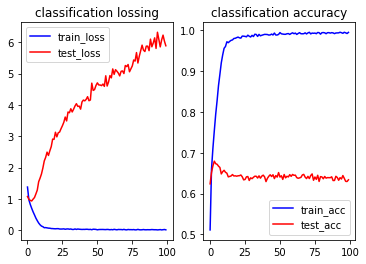

In [14]:
merge_all()

#### 首先看到test result：63.39%  准确度太低, 其次从图上看在10个epoch的时候就出现了过拟合现象, 因此想继续增加神经网络层数先让test result得以提升。 

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 64s 1ms/sample - loss: 1.3747 - accuracy: 0.5059 - val_loss: 1.0815 - val_accuracy: 0.6069
Epoch 2/100
50000/50000 [==============================] - 64s 1ms/sample - loss: 0.9230 - accuracy: 0.6762 - val_loss: 0.8862 - val_accuracy: 0.6896
Epoch 3/100
50000/50000 [==============================] - 63s 1ms/sample - loss: 0.7487 - accuracy: 0.7390 - val_loss: 0.8468 - val_accuracy: 0.7124
Epoch 4/100
50000/50000 [==============================] - 65s 1ms/sample - loss: 0.6156 - accuracy: 0.7837 - val_loss: 0.7871 - val_accuracy: 0.7347
Epoch 5/100
50000/50000 [==============================] - 65s 1ms/sample - loss: 0.5070 - accuracy: 0.8221 - val_loss: 0.7637 - val_accuracy: 0.7494
Epoch 6/100
50000/50000 [==============================] - 64s 1ms/sample - loss: 0.4121 - accuracy: 0.8532 - val_loss: 0.8149 - val_accuracy: 0.7438
Epoch 7/100
50000/50000 [=========================

Epoch 55/100
50000/50000 [==============================] - 65s 1ms/sample - loss: 0.0407 - accuracy: 0.9879 - val_loss: 2.9142 - val_accuracy: 0.7231
Epoch 56/100
50000/50000 [==============================] - 66s 1ms/sample - loss: 0.0456 - accuracy: 0.9869 - val_loss: 3.0355 - val_accuracy: 0.7163
Epoch 57/100
50000/50000 [==============================] - 65s 1ms/sample - loss: 0.0404 - accuracy: 0.9880 - val_loss: 3.0929 - val_accuracy: 0.7251
Epoch 58/100
50000/50000 [==============================] - 65s 1ms/sample - loss: 0.0437 - accuracy: 0.9872 - val_loss: 2.9129 - val_accuracy: 0.7193
Epoch 59/100
50000/50000 [==============================] - 66s 1ms/sample - loss: 0.0416 - accuracy: 0.9876 - val_loss: 3.0131 - val_accuracy: 0.7197
Epoch 60/100
50000/50000 [==============================] - 65s 1ms/sample - loss: 0.0393 - accuracy: 0.9882 - val_loss: 2.8416 - val_accuracy: 0.7242
Epoch 61/100
50000/50000 [==============================] - 65s 1ms/sample - loss: 0.0326 - ac

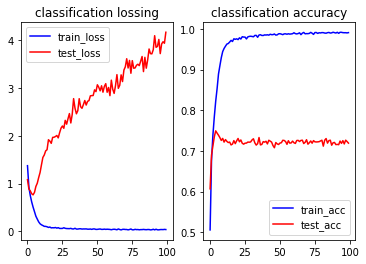

In [15]:
# 两层
def mode_define():
    model = models.Sequential()
    model.add(layers.Conv2D(32,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal', input_shape = (32, 32, 3)))
    model.add(layers.Conv2D(32,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal'))
    model.add(layers.MaxPooling2D((2,2)))
    
    model.add(layers.Conv2D(64,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal'))
    model.add(layers.Conv2D(64,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal'))
    model.add(layers.MaxPooling2D((2,2)))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer = optimizers.Adam(),
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
    
    return model
 
    
    
merge_all()


#### 首先看到test result：71.92%  准确度得以提升了, 其次从图上看还是在10个epoch的时候就出现了过拟合现象, 因此想继续增加神经网络层数看是否能让test result进一步提升。 

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 80s 2ms/sample - loss: 1.4086 - accuracy: 0.4904 - val_loss: 1.0338 - val_accuracy: 0.6297
Epoch 2/100
50000/50000 [==============================] - 80s 2ms/sample - loss: 0.9182 - accuracy: 0.6774 - val_loss: 0.8435 - val_accuracy: 0.7031
Epoch 3/100
50000/50000 [==============================] - 80s 2ms/sample - loss: 0.7132 - accuracy: 0.7528 - val_loss: 0.7757 - val_accuracy: 0.7350
Epoch 4/100
50000/50000 [==============================] - 80s 2ms/sample - loss: 0.5834 - accuracy: 0.7983 - val_loss: 0.6903 - val_accuracy: 0.7635
Epoch 5/100
50000/50000 [==============================] - 80s 2ms/sample - loss: 0.4774 - accuracy: 0.8339 - val_loss: 0.7065 - val_accuracy: 0.7685
Epoch 6/100
50000/50000 [==============================] - 80s 2ms/sample - loss: 0.3896 - accuracy: 0.8629 - val_loss: 0.7302 - val_accuracy: 0.7602
Epoch 7/100
50000/50000 [=========================

Epoch 55/100
50000/50000 [==============================] - 81s 2ms/sample - loss: 0.0714 - accuracy: 0.9788 - val_loss: 1.8358 - val_accuracy: 0.7628
Epoch 56/100
50000/50000 [==============================] - 80s 2ms/sample - loss: 0.0586 - accuracy: 0.9822 - val_loss: 1.8722 - val_accuracy: 0.7627
Epoch 57/100
50000/50000 [==============================] - 80s 2ms/sample - loss: 0.0612 - accuracy: 0.9824 - val_loss: 1.7693 - val_accuracy: 0.7616
Epoch 58/100
50000/50000 [==============================] - 80s 2ms/sample - loss: 0.0687 - accuracy: 0.9792 - val_loss: 1.9094 - val_accuracy: 0.7565
Epoch 59/100
50000/50000 [==============================] - 80s 2ms/sample - loss: 0.0610 - accuracy: 0.9825 - val_loss: 1.9995 - val_accuracy: 0.7527
Epoch 60/100
50000/50000 [==============================] - 80s 2ms/sample - loss: 0.0706 - accuracy: 0.9788 - val_loss: 1.8931 - val_accuracy: 0.7662
Epoch 61/100
50000/50000 [==============================] - 80s 2ms/sample - loss: 0.0601 - ac

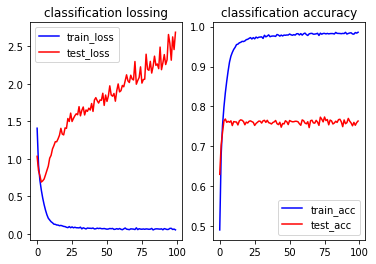

In [16]:
# 三层
def mode_define():
    model = models.Sequential()
    model.add(layers.Conv2D(32,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal', input_shape = (32, 32, 3)))
    model.add(layers.Conv2D(32,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal'))
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Conv2D(64,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal'))
    model.add(layers.Conv2D(64,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal'))
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Conv2D(128,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal'))
    model.add(layers.Conv2D(128,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal'))
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer = optimizers.Adam(),
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])

    return model
 
 
#########
merge_all()   


#### 首先看到test result：76.34%  准确度又进一步提升了, 其次从图上看还是在10个epoch的时候就出现了过拟合现象, 因此继续增加神经网络层数确实可以进一步提升test result, 但是过拟合现象还是发生在10个epoch的时候, 于是增加层数已经没啥意义, 应该从减轻过拟合入手, 于是就从3层神经网络的基础上进一步加入减轻过拟合的手段: 1、dropout; 2、正则化  3、Data Augmentation  4、batchnormalization； 5、各种方法的融合

1、dropout: 可从两个方面入手, 一个是各个神经网络层采用固定的dropout率; 二是随着神经网络层数的增加, dropout率随之增加(递增dropout) 

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 85s 2ms/sample - loss: 1.6024 - accuracy: 0.4043 - val_loss: 1.2476 - val_accuracy: 0.5471
Epoch 2/100
50000/50000 [==============================] - 83s 2ms/sample - loss: 1.1437 - accuracy: 0.5897 - val_loss: 0.9854 - val_accuracy: 0.6517
Epoch 3/100
50000/50000 [==============================] - 84s 2ms/sample - loss: 0.9407 - accuracy: 0.6703 - val_loss: 0.8157 - val_accuracy: 0.7116
Epoch 4/100
50000/50000 [==============================] - 83s 2ms/sample - loss: 0.8217 - accuracy: 0.7131 - val_loss: 0.7475 - val_accuracy: 0.7411
Epoch 5/100
50000/50000 [==============================] - 83s 2ms/sample - loss: 0.7437 - accuracy: 0.7412 - val_loss: 0.7931 - val_accuracy: 0.7324
Epoch 6/100
50000/50000 [==============================] - 83s 2ms/sample - loss: 0.6840 - accuracy: 0.7604 - val_loss: 0.6854 - val_accuracy: 0.7670
Epoch 7/100
50000/50000 [=========================

Epoch 55/100
50000/50000 [==============================] - 84s 2ms/sample - loss: 0.2462 - accuracy: 0.9164 - val_loss: 0.7226 - val_accuracy: 0.8137
Epoch 56/100
50000/50000 [==============================] - 84s 2ms/sample - loss: 0.2468 - accuracy: 0.9148 - val_loss: 0.7140 - val_accuracy: 0.8174
Epoch 57/100
50000/50000 [==============================] - 85s 2ms/sample - loss: 0.2467 - accuracy: 0.9152 - val_loss: 0.6741 - val_accuracy: 0.8166
Epoch 58/100
50000/50000 [==============================] - 85s 2ms/sample - loss: 0.2464 - accuracy: 0.9161 - val_loss: 0.6586 - val_accuracy: 0.8210
Epoch 59/100
50000/50000 [==============================] - 85s 2ms/sample - loss: 0.2437 - accuracy: 0.9168 - val_loss: 0.6939 - val_accuracy: 0.8186
Epoch 60/100
50000/50000 [==============================] - 90s 2ms/sample - loss: 0.2414 - accuracy: 0.9168 - val_loss: 0.6683 - val_accuracy: 0.8285
Epoch 61/100
50000/50000 [==============================] - 84s 2ms/sample - loss: 0.2450 - ac

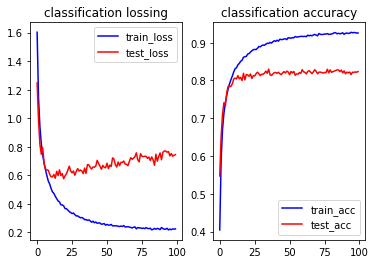

In [17]:
####加dropout
def mode_define():
    model = models.Sequential()
    model.add(layers.Conv2D(32,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal', input_shape = (32, 32, 3)))
    model.add(layers.Conv2D(32,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(64,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal'))
    model.add(layers.Conv2D(64,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(128,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal'))
    model.add(layers.Conv2D(128,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer = optimizers.Adam(),
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])

    return model


merge_all()      


#### 首先看到test result：82.35%  准确度提升了很多（说明还是很有效果的）, 其次从图上看也是在10个epoch的时候出现了过拟合现象。

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 89s 2ms/sample - loss: 5.9179 - accuracy: 0.3485 - val_loss: 2.4321 - val_accuracy: 0.4674
Epoch 2/100
50000/50000 [==============================] - 88s 2ms/sample - loss: 2.2827 - accuracy: 0.5106 - val_loss: 2.1521 - val_accuracy: 0.5404
Epoch 3/100
50000/50000 [==============================] - 88s 2ms/sample - loss: 2.0284 - accuracy: 0.5826 - val_loss: 1.9412 - val_accuracy: 0.6070
Epoch 4/100
50000/50000 [==============================] - 88s 2ms/sample - loss: 1.8436 - accuracy: 0.6343 - val_loss: 1.8889 - val_accuracy: 0.6047
Epoch 5/100
50000/50000 [==============================] - 87s 2ms/sample - loss: 1.6909 - accuracy: 0.6689 - val_loss: 1.7127 - val_accuracy: 0.6590
Epoch 6/100
50000/50000 [==============================] - 88s 2ms/sample - loss: 1.5566 - accuracy: 0.6998 - val_loss: 1.6123 - val_accuracy: 0.6782
Epoch 7/100
50000/50000 [=========================

Epoch 55/100
50000/50000 [==============================] - 88s 2ms/sample - loss: 0.6507 - accuracy: 0.9045 - val_loss: 1.1562 - val_accuracy: 0.7820
Epoch 56/100
50000/50000 [==============================] - 87s 2ms/sample - loss: 0.6499 - accuracy: 0.9042 - val_loss: 1.2233 - val_accuracy: 0.7592
Epoch 57/100
50000/50000 [==============================] - 87s 2ms/sample - loss: 0.6555 - accuracy: 0.9030 - val_loss: 1.2259 - val_accuracy: 0.7686
Epoch 58/100
50000/50000 [==============================] - 87s 2ms/sample - loss: 0.6460 - accuracy: 0.9053 - val_loss: 1.1828 - val_accuracy: 0.7715
Epoch 59/100
50000/50000 [==============================] - 88s 2ms/sample - loss: 0.6493 - accuracy: 0.9061 - val_loss: 1.1995 - val_accuracy: 0.7671
Epoch 60/100
50000/50000 [==============================] - 87s 2ms/sample - loss: 0.6427 - accuracy: 0.9069 - val_loss: 1.1641 - val_accuracy: 0.7832
Epoch 61/100
50000/50000 [==============================] - 87s 2ms/sample - loss: 0.6430 - ac

test result: 78.570


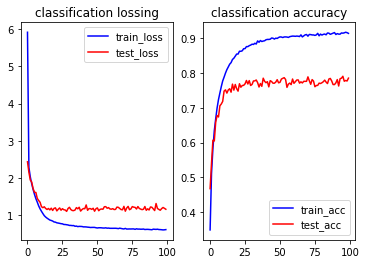

In [12]:
# 权重衰减(正则化，正则化分L1和L2, 在神经网络中优化过程中用的最多的是正则化L2) 
from tensorflow.keras.regularizers import l2 

def mode_define():
    model = models.Sequential()
    model.add(layers.Conv2D(32,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer = l2(0.001), input_shape = (32, 32, 3)))
    model.add(layers.Conv2D(32,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer = l2(0.001)))
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Conv2D(64,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer = l2(0.001)))
    model.add(layers.Conv2D(64,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer = l2(0.001)))
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Conv2D(128,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer = l2(0.001)))
    model.add(layers.Conv2D(128,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer = l2(0.001)))
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer = l2(0.001)))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer = optimizers.Adam(),
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])

    return model

    
    
merge_all()


#### 首先看到test result：78.57% ，相比于之前三层的准确度76.34%,  准确度提升有限,  跟dropout的82.35%相比, 准确度提升效果不大, 同时可以看到模型还是大概在10 epoch的时候出现了过拟合现象, 说明该方法在防止过拟合方面效果不佳。

Epoch 1/100
782/782 [==============================] - 158s 203ms/step - loss: 1.5216 - accuracy: 0.4415 - val_loss: 1.1465 - val_accuracy: 0.5920
Epoch 2/100
782/782 [==============================] - 157s 201ms/step - loss: 1.0620 - accuracy: 0.6224 - val_loss: 0.9112 - val_accuracy: 0.6820
Epoch 3/100
782/782 [==============================] - 156s 199ms/step - loss: 0.8649 - accuracy: 0.6970 - val_loss: 0.8231 - val_accuracy: 0.7231
Epoch 4/100
782/782 [==============================] - 156s 199ms/step - loss: 0.7595 - accuracy: 0.7345 - val_loss: 0.8078 - val_accuracy: 0.7271
Epoch 5/100
782/782 [==============================] - 156s 199ms/step - loss: 0.6955 - accuracy: 0.7577 - val_loss: 0.6693 - val_accuracy: 0.7738
Epoch 6/100
782/782 [==============================] - 156s 200ms/step - loss: 0.6372 - accuracy: 0.7790 - val_loss: 0.6812 - val_accuracy: 0.7747
Epoch 7/100
782/782 [==============================] - 156s 199ms/step - loss: 0.6051 - accuracy: 0.7897 - val_loss: 0

test result: 85.030


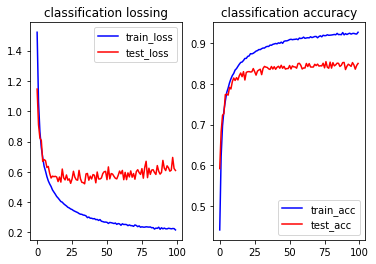

In [18]:
# Data Augmentation ---控制过拟合还可以从增加样本量来进行, 于是Data Augmentation就有助于该方面的实现。

def mode_define():
    model = models.Sequential()
    model.add(layers.Conv2D(32,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal', input_shape = (32, 32, 3)))
    model.add(layers.Conv2D(32,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal'))
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Conv2D(64,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal'))
    model.add(layers.Conv2D(64,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal'))
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Conv2D(128,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal'))
    model.add(layers.Conv2D(128,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal'))
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer = optimizers.Adam(),
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])

    return model




def merge_all():
    x_train, y_train, x_test, y_test = dataset_load()
    x_train, x_test = dataset_scale(x_train, x_test)
    model = mode_define()
    
    
    augment_set = ImageDataGenerator(width_shift_range=0.1, 
                                     height_shift_range=0.1, 
                                     horizontal_flip=True)


    historys = model.fit_generator(augment_set.flow(x_train, y_train, batch_size=64), epochs=100, validation_data=(x_test, y_test), workers=-1)
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print('test result: %.3f' %(test_acc*100.0))
    
    results_analyse(historys)



merge_all()


#### 首先看到test result：85.03% ，相比于dropout的82.35%相比, 准确度提升效果还是挺大的, 同时可以看到模型还是大概在10 epoch的时候出现了过拟合现象

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 92s 2ms/sample - loss: 1.8287 - accuracy: 0.3199 - val_loss: 1.4015 - val_accuracy: 0.4723
Epoch 2/100
50000/50000 [==============================] - 91s 2ms/sample - loss: 1.3624 - accuracy: 0.5056 - val_loss: 1.1752 - val_accuracy: 0.5719
Epoch 3/100
50000/50000 [==============================] - 91s 2ms/sample - loss: 1.1583 - accuracy: 0.5927 - val_loss: 0.9701 - val_accuracy: 0.6553
Epoch 4/100
50000/50000 [==============================] - 91s 2ms/sample - loss: 1.0107 - accuracy: 0.6474 - val_loss: 0.8370 - val_accuracy: 0.7078
Epoch 5/100
50000/50000 [==============================] - 91s 2ms/sample - loss: 0.9243 - accuracy: 0.6779 - val_loss: 0.8108 - val_accuracy: 0.7170
Epoch 6/100
50000/50000 [==============================] - 91s 2ms/sample - loss: 0.8569 - accuracy: 0.7042 - val_loss: 0.7384 - val_accuracy: 0.7396
Epoch 7/100
50000/50000 [=========================

Epoch 55/100
50000/50000 [==============================] - 91s 2ms/sample - loss: 0.4432 - accuracy: 0.8472 - val_loss: 0.5455 - val_accuracy: 0.8287
Epoch 56/100
50000/50000 [==============================] - 91s 2ms/sample - loss: 0.4404 - accuracy: 0.8501 - val_loss: 0.5843 - val_accuracy: 0.8284
Epoch 57/100
50000/50000 [==============================] - 91s 2ms/sample - loss: 0.4436 - accuracy: 0.8494 - val_loss: 0.5839 - val_accuracy: 0.8196
Epoch 58/100
50000/50000 [==============================] - 91s 2ms/sample - loss: 0.4479 - accuracy: 0.8473 - val_loss: 0.5750 - val_accuracy: 0.8271
Epoch 59/100
50000/50000 [==============================] - 91s 2ms/sample - loss: 0.4445 - accuracy: 0.8496 - val_loss: 0.5919 - val_accuracy: 0.8237
Epoch 60/100
50000/50000 [==============================] - 91s 2ms/sample - loss: 0.4368 - accuracy: 0.8523 - val_loss: 0.5569 - val_accuracy: 0.8297
Epoch 61/100
50000/50000 [==============================] - 91s 2ms/sample - loss: 0.4401 - ac

test result: 82.950


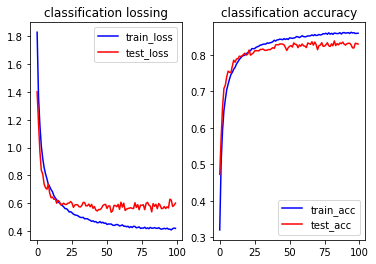

In [12]:
# 递进dropout ---因固定的drop有用, 因此就进一步实现递进dropout率，加大了epoch的数量看是否延缓了过拟合现象

def mode_define():
    model = models.Sequential()
    model.add(layers.Conv2D(32,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal', input_shape = (32, 32, 3)))
    model.add(layers.Conv2D(32,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Dropout(0.2))
    
    model.add(layers.Conv2D(64,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal'))
    model.add(layers.Conv2D(64,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Dropout(0.3))
    
    model.add(layers.Conv2D(128,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal'))
    model.add(layers.Conv2D(128,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Dropout(0.4))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer = optimizers.Adam(),
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
    
    return model
 
 
 
def merge_all():
    x_train, y_train, x_test, y_test = dataset_load()
    x_train, x_test = dataset_scale(x_train, x_test)
    model = mode_define()

    historys = model.fit(x_train, y_train, epochs = 100, batch_size = 64, validation_data = (x_test, y_test), workers=-1)

    test_loss, test_acc = model.evaluate(x_test, y_test)
    print('test result: %.3f' %(test_acc*100.0))

    results_analyse(historys)
      
      
      
merge_all()


#### 首先可以看到递进的dropout的test result：82.95% ，相比于dropout的82.35%相比, 准确度还是有提升空间, 但是可以看到模型还是大概在10 epoch的时候出现了过拟合现象, 所以单纯的防过拟合方式对防止过拟合效果有限, 可以考虑组合各种防过拟合方法。

Epoch 1/200
782/782 [==============================] - 162s 208ms/step - loss: 1.9504 - accuracy: 0.2781 - val_loss: 1.5027 - val_accuracy: 0.4577
Epoch 2/200
782/782 [==============================] - 162s 208ms/step - loss: 1.5527 - accuracy: 0.4332 - val_loss: 1.4318 - val_accuracy: 0.4906
Epoch 3/200
782/782 [==============================] - 162s 207ms/step - loss: 1.3771 - accuracy: 0.5020 - val_loss: 1.1177 - val_accuracy: 0.5932
Epoch 4/200
782/782 [==============================] - 162s 207ms/step - loss: 1.2553 - accuracy: 0.5530 - val_loss: 1.0316 - val_accuracy: 0.6381
Epoch 5/200
782/782 [==============================] - 162s 207ms/step - loss: 1.1623 - accuracy: 0.5924 - val_loss: 1.0631 - val_accuracy: 0.6239
Epoch 6/200
782/782 [==============================] - 163s 209ms/step - loss: 1.0919 - accuracy: 0.6193 - val_loss: 0.8940 - val_accuracy: 0.6818
Epoch 7/200
782/782 [==============================] - 166s 212ms/step - loss: 1.0424 - accuracy: 0.6354 - val_loss: 0

782/782 [==============================] - 163s 208ms/step - loss: 0.6057 - accuracy: 0.7977 - val_loss: 0.5974 - val_accuracy: 0.8124
Epoch 112/200
782/782 [==============================] - 163s 208ms/step - loss: 0.5919 - accuracy: 0.8051 - val_loss: 0.5265 - val_accuracy: 0.8350
Epoch 113/200
782/782 [==============================] - 163s 208ms/step - loss: 0.6018 - accuracy: 0.8027 - val_loss: 0.5629 - val_accuracy: 0.8237
Epoch 114/200
782/782 [==============================] - 163s 208ms/step - loss: 0.6010 - accuracy: 0.8038 - val_loss: 0.5976 - val_accuracy: 0.8106
Epoch 115/200
782/782 [==============================] - 163s 208ms/step - loss: 0.5893 - accuracy: 0.8040 - val_loss: 0.5586 - val_accuracy: 0.8232
Epoch 116/200
782/782 [==============================] - 163s 208ms/step - loss: 0.5889 - accuracy: 0.8046 - val_loss: 0.5797 - val_accuracy: 0.8163
Epoch 117/200
782/782 [==============================] - 163s 208ms/step - loss: 0.6021 - accuracy: 0.8002 - val_loss: 0

782/782 [==============================] - 162s 207ms/step - loss: 0.5879 - accuracy: 0.8041 - val_loss: 0.6048 - val_accuracy: 0.8098
Epoch 167/200
782/782 [==============================] - 162s 207ms/step - loss: 0.5931 - accuracy: 0.8063 - val_loss: 0.5536 - val_accuracy: 0.8226
Epoch 168/200
782/782 [==============================] - 162s 207ms/step - loss: 0.5927 - accuracy: 0.8057 - val_loss: 0.5387 - val_accuracy: 0.8282
Epoch 169/200
782/782 [==============================] - 162s 207ms/step - loss: 0.5856 - accuracy: 0.8082 - val_loss: 0.6358 - val_accuracy: 0.8015
Epoch 170/200
782/782 [==============================] - 162s 207ms/step - loss: 0.5914 - accuracy: 0.8064 - val_loss: 0.5645 - val_accuracy: 0.8180
Epoch 171/200
782/782 [==============================] - 162s 207ms/step - loss: 0.5880 - accuracy: 0.8075 - val_loss: 0.5623 - val_accuracy: 0.8206
Epoch 172/200
782/782 [==============================] - 162s 208ms/step - loss: 0.5927 - accuracy: 0.8069 - val_loss: 0

test result: 83.200


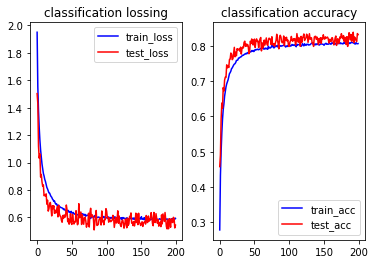

In [8]:
# drop递进 + Data Augmentation   ----方法间的融合，加大了epoch的数量看是否延缓了过拟合现象

def mode_define():
    model = models.Sequential()
    model.add(layers.Conv2D(32,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal', input_shape = (32, 32, 3)))
    model.add(layers.Conv2D(32,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Dropout(0.2))
    
    model.add(layers.Conv2D(64,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal'))
    model.add(layers.Conv2D(64,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Dropout(0.3))
    
    model.add(layers.Conv2D(128,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal'))
    model.add(layers.Conv2D(128,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Dropout(0.4))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer = optimizers.Adam(),
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
    
    return model
 

    
def merge_all():
    x_train, y_train, x_test, y_test = dataset_load()
    x_train, x_test = dataset_scale(x_train, x_test)
    model = mode_define()
    
    
    augment_set = ImageDataGenerator(width_shift_range=0.1, 
                                     height_shift_range=0.1, 
                                     horizontal_flip=True)
    
    historys = model.fit_generator(augment_set.flow(x_train, y_train, batch_size = 64), epochs=200, validation_data=(x_test, y_test), workers=-1)
    
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print('test result: %.3f' %(test_acc*100.0))
    
    results_analyse(historys)


    
merge_all()


#### 首先可以看到两者组合后的test result：83.2% ，相比于单纯的dropout 82.35%相比, 准确度提升了很多, 相比于单纯的Data Augmentation 85.03%,准确度没有提升, 但是从图上看在两者组合方法至少在100epoch之后才慢慢出现过拟合现象, 大大延长了单纯的Data Augmentation在10 epoch就出现过拟合现象，说明组合方法有效。


Epoch 1/200
782/782 [==============================] - 238s 305ms/step - loss: 1.7700 - accuracy: 0.3861 - val_loss: 1.4290 - val_accuracy: 0.4929
Epoch 2/200
782/782 [==============================] - 238s 304ms/step - loss: 1.2719 - accuracy: 0.5416 - val_loss: 1.0152 - val_accuracy: 0.6337
Epoch 3/200
782/782 [==============================] - 238s 305ms/step - loss: 1.0785 - accuracy: 0.6186 - val_loss: 1.1242 - val_accuracy: 0.6184
Epoch 4/200
782/782 [==============================] - 238s 305ms/step - loss: 0.9593 - accuracy: 0.6624 - val_loss: 0.8482 - val_accuracy: 0.7029
Epoch 5/200
782/782 [==============================] - 238s 304ms/step - loss: 0.8785 - accuracy: 0.6959 - val_loss: 0.8698 - val_accuracy: 0.7006
Epoch 6/200
782/782 [==============================] - 238s 304ms/step - loss: 0.8121 - accuracy: 0.7193 - val_loss: 0.6993 - val_accuracy: 0.7611
Epoch 7/200
782/782 [==============================] - 238s 304ms/step - loss: 0.7696 - accuracy: 0.7345 - val_loss: 0

782/782 [==============================] - 232s 297ms/step - loss: 0.2904 - accuracy: 0.8999 - val_loss: 0.3278 - val_accuracy: 0.8943
Epoch 112/200
782/782 [==============================] - 232s 297ms/step - loss: 0.2924 - accuracy: 0.9011 - val_loss: 0.3289 - val_accuracy: 0.8892
Epoch 113/200
782/782 [==============================] - 233s 298ms/step - loss: 0.2993 - accuracy: 0.8981 - val_loss: 0.3596 - val_accuracy: 0.8817
Epoch 114/200
782/782 [==============================] - 233s 298ms/step - loss: 0.2970 - accuracy: 0.8985 - val_loss: 0.3161 - val_accuracy: 0.8962
Epoch 115/200
782/782 [==============================] - 232s 297ms/step - loss: 0.2944 - accuracy: 0.8993 - val_loss: 0.3319 - val_accuracy: 0.8920
Epoch 116/200
782/782 [==============================] - 232s 297ms/step - loss: 0.2896 - accuracy: 0.9002 - val_loss: 0.3296 - val_accuracy: 0.8946
Epoch 117/200
782/782 [==============================] - 232s 297ms/step - loss: 0.2905 - accuracy: 0.9006 - val_loss: 0

782/782 [==============================] - 233s 298ms/step - loss: 0.2622 - accuracy: 0.9110 - val_loss: 0.3326 - val_accuracy: 0.8931
Epoch 167/200
782/782 [==============================] - 233s 298ms/step - loss: 0.2637 - accuracy: 0.9095 - val_loss: 0.3126 - val_accuracy: 0.8978
Epoch 168/200
782/782 [==============================] - 233s 298ms/step - loss: 0.2596 - accuracy: 0.9110 - val_loss: 0.3440 - val_accuracy: 0.8907
Epoch 169/200
782/782 [==============================] - 233s 298ms/step - loss: 0.2591 - accuracy: 0.9112 - val_loss: 0.3180 - val_accuracy: 0.8984
Epoch 170/200
782/782 [==============================] - 233s 298ms/step - loss: 0.2600 - accuracy: 0.9099 - val_loss: 0.3410 - val_accuracy: 0.8936
Epoch 171/200
782/782 [==============================] - 233s 298ms/step - loss: 0.2629 - accuracy: 0.9093 - val_loss: 0.3264 - val_accuracy: 0.8938
Epoch 172/200
782/782 [==============================] - 233s 298ms/step - loss: 0.2603 - accuracy: 0.9116 - val_loss: 0

test result: 89.810


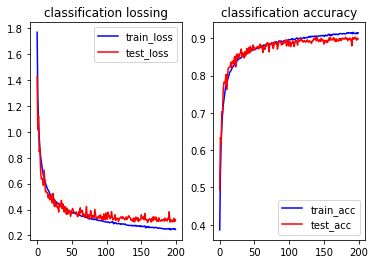

In [12]:
# drop递进 + Data Augmentation + batchnormalization(batchnormalization 有助于加快拟合速度, 因加大了epoch的数量看是否延缓了过拟合现象)
def mode_define():
    model = models.Sequential()
    model.add(layers.Conv2D(32,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal', input_shape = (32, 32, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Dropout(0.2))
    
    model.add(layers.Conv2D(64,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Dropout(0.3))
    
    model.add(layers.Conv2D(128,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Dropout(0.4))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer = optimizers.Adam(),
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
    
    return model
 

    
def merge_all():
    x_train, y_train, x_test, y_test = dataset_load()
    x_train, x_test = dataset_scale(x_train, x_test)
    model = mode_define()
    
    
    augment_set = ImageDataGenerator(width_shift_range=0.1, 
                                     height_shift_range=0.1, 
                                     horizontal_flip=True)
    
    historys = model.fit_generator(augment_set.flow(x_train, y_train, batch_size = 64), epochs=200, validation_data=(x_test, y_test), workers=-1)
    
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print('test result: %.3f' %(test_acc*100.0))
    
    results_analyse(historys)



merge_all() 

#### 首先可以看到两者组合后的test result：89.81% ，相比于单纯的递进 dropout 82.95%相比, 准确度也提升了很多, 相比于单纯的Data Augmentation 85.03%,准确度没有提升, 同时从图上看在两者组合方法甚至在200epoch都没有出现过拟合现象, 说明该组合方式鲁棒性很强, 训练出来的模型非常有效！ 

In [23]:
# drop递进 + Data Augmentation + batchnormalization(batchnormalization 有助于加快拟合速度, 因加大了epoch的数量看是否延缓了过拟合现象)
def mode_define():
    model = models.Sequential()
    model.add(layers.Conv2D(32,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal', input_shape = (32, 32, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Dropout(0.2))
    
    model.add(layers.Conv2D(64,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Dropout(0.3))
    
    model.add(layers.Conv2D(128,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128,(3,3), padding = 'same',  activation = 'relu', kernel_initializer = 'he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Dropout(0.4))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer = optimizers.Adam(),
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
    
    return model
 

    
def merge_all():
    x_train, y_train, x_test, y_test = dataset_load()
    dataset_scale(x_train, x_test)
    model = mode_define()
    
    
    augment_set = ImageDataGenerator(width_shift_range=0.1, 
                                     height_shift_range=0.1, 
                                     horizontal_flip=True)
    
    historys = model.fit_generator(augment_set.flow(x_train, y_train, batch_size = 64), epochs=400, validation_data=(x_test, y_test), workers=-1)
    
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print('test result: %.3f' %(test_acc*100.0))
    
    results_analyse(historys)



merge_all()    


Epoch 1/400
782/782 [==============================] - 221s 282ms/step - loss: 1.7805 - accuracy: 0.3932 - val_loss: 1.2870 - val_accuracy: 0.5410
Epoch 2/400
782/782 [==============================] - 221s 282ms/step - loss: 1.2287 - accuracy: 0.5613 - val_loss: 1.0482 - val_accuracy: 0.6285
Epoch 3/400
782/782 [==============================] - 221s 282ms/step - loss: 1.0390 - accuracy: 0.6318 - val_loss: 0.8725 - val_accuracy: 0.6947
Epoch 4/400
782/782 [==============================] - 221s 282ms/step - loss: 0.9393 - accuracy: 0.6716 - val_loss: 0.9043 - val_accuracy: 0.6935
Epoch 5/400
782/782 [==============================] - 221s 282ms/step - loss: 0.8561 - accuracy: 0.6996 - val_loss: 0.7791 - val_accuracy: 0.7301
Epoch 6/400
782/782 [==============================] - 221s 282ms/step - loss: 0.8061 - accuracy: 0.7215 - val_loss: 0.7201 - val_accuracy: 0.7514
Epoch 7/400
782/782 [==============================] - 221s 282ms/step - loss: 0.7548 - accuracy: 0.7401 - val_loss: 0

782/782 [==============================] - 222s 284ms/step - loss: 0.2905 - accuracy: 0.9006 - val_loss: 0.3779 - val_accuracy: 0.8823
Epoch 112/400
782/782 [==============================] - 222s 284ms/step - loss: 0.2923 - accuracy: 0.8991 - val_loss: 0.3583 - val_accuracy: 0.8837
Epoch 113/400
782/782 [==============================] - 222s 284ms/step - loss: 0.2947 - accuracy: 0.8983 - val_loss: 0.3666 - val_accuracy: 0.8846
Epoch 114/400
782/782 [==============================] - 222s 284ms/step - loss: 0.2955 - accuracy: 0.8975 - val_loss: 0.3612 - val_accuracy: 0.8847
Epoch 115/400
782/782 [==============================] - 222s 284ms/step - loss: 0.2940 - accuracy: 0.9014 - val_loss: 0.3329 - val_accuracy: 0.8935
Epoch 116/400
782/782 [==============================] - 222s 284ms/step - loss: 0.2897 - accuracy: 0.9011 - val_loss: 0.3677 - val_accuracy: 0.8817
Epoch 117/400
782/782 [==============================] - 222s 283ms/step - loss: 0.2892 - accuracy: 0.9005 - val_loss: 0

782/782 [==============================] - 228s 291ms/step - loss: 0.2640 - accuracy: 0.9085 - val_loss: 0.3559 - val_accuracy: 0.8869
Epoch 167/400
782/782 [==============================] - 228s 292ms/step - loss: 0.2571 - accuracy: 0.9099 - val_loss: 0.3249 - val_accuracy: 0.8928
Epoch 168/400
782/782 [==============================] - 228s 292ms/step - loss: 0.2584 - accuracy: 0.9121 - val_loss: 0.3296 - val_accuracy: 0.8958
Epoch 169/400
587/782 [=====================>........] - ETA: 51s - loss: 0.2602 - accuracy: 0.9126

KeyboardInterrupt: 

#### 这部分可以作为一种尝试性实验, 把epoch次数加到400, 看最终得到的准确度是否能得到进一步的提升！

### 4. Optional 

##### Do you want to build a CNN from scratch ? 

In this optianl part, you will build a cnn network step by step.

In [30]:
import numpy as np
np.random.seed(1)

##### 4.1 Implement a convolution step

Hints: Numpy.sum function might be useful.

In [32]:
def conv_single_step(a_slice_prev,W,b):
    '''
    Apply one filter defined by parameters W on a single slice (a_slice_prev) of the output activation 
    of the previous layer.
    Arguments:
    a_prev_slice: slice of input data (shape=(f,f,n_C_prev))
    W: Weight parameters contained in a window. (shape = (f,f,n_C_prev))
    b: Bias parameters contained in a window. (shape=(1,1,1))
    
    Reutrns:
    
    Z: a scalar value, the result of convolving the sliding window (W, b) on a slice x of the input data 
    '''
    # Element-wise product
    s = np.multiply(a_slice_prev,W)
    
    # Sum over s  
    Z = np.sum(s)
    
    # Add bias b to z.
    Z = Z + b
    
    return Z

In [33]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)

Z = [[[-6.99908945]]]


Use the code above to test your code. If your c
ode is correct, you should be able to get the output shown as below.

<table>
    <tr>
        <td>
            Z
        </td>
        <td>
            -6.99908945068
        </td>
    </tr>

</table>

##### 4.2 Padding

Hints: Numpy.pad function might be useful.

In [35]:
def zero_pad(X, pad):
    """
    Pad with zeros all images of the dataset X. The padding is applied to the height and width of an image, 
    as illustrated in Figure 1.
    
    Argument:
    X: python numpy array of shape (m, n_H, n_W, n_C) representing a batch of m images
    pad: integer, amount of padding around each image on vertical and horizontal dimensions
    
    Returns:
    X_pad: padded image of shape (m, n_H + 2*pad, n_W + 2*pad, n_C)
    """

    X_pad = np.pad(X, ((0,0),(pad, pad),(pad, pad),(0, 0)), 'constant')
    
    return X_pad

In [36]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 2)
print ("x.shape =\n", x.shape)
print ("x_pad.shape =\n", x_pad.shape)
print ("x[1,1] =\n", x[1,1])
print ("x_pad[1,1] =\n", x_pad[1,1])

x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 7, 7, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


Use the code above to test your code. If your code is correct, you should be able to get the output shown as below.

```
x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 7, 7, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
```

##### 4.3 Implement a forward propagation in CNN.

Hints: The formulas to calculate the output shapes are :

$$ n_H = \lfloor \frac{n_{H_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_W = \lfloor \frac{n_{W_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_C = \text{number of filters used in the convolution}$$

In [37]:
def conv_forward(A_prev, W, b, hparameters):
    """
    Implements the forward propagation for a convolution function
    
    Arguments:
    A_prev: output activations of the previous layer, 
        numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    W: Weights, numpy array of shape (f, f, n_C_prev, n_C)
    b: Biases, numpy array of shape (1, 1, 1, n_C)
    hparameters: python dictionary containing "stride" and "pad"
        
    Returns:
    Z: conv output, numpy array of shape (m, n_H, n_W, n_C)
    cache: cache of values needed for the conv_backward() function
    """
    
    # Get dimensions from A_prev's shape  
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Get dimensions from W's shape 
    (f, f, n_C_prev, n_C) = W.shape
    
    # Get information from "hparameters" 
    stride = hparameters['stride']
    pad = hparameters['pad']
    
    # Compute the dimensions of the CONV output volume using the formula given above. 
    # Hint: use int() to apply the 'floor' operation. 
    n_H = int((n_H_prev - f + 2*pad) / stride) + 1   ## np.floor最终的结果还是float类型, int()更直接
    n_W = int((n_W_prev - f + 2*pad) / stride) + 1
    
    # Initialize the output volume Z with zeros. 
    Z = np.zeros((m, n_H, n_W, n_C))
    
    # Create A_prev_pad by padding A_prev
    A_prev_pad = zero_pad(A_prev, pad)
    
    for i in range(m):      #batch大小设为1     # loop over the batch of training examples
        a_prev_pad = A_prev_pad[i]               # Select ith training example's padded activation
        for h in range(n_H):           # loop over vertical axis of the output volume
            # Find the vertical start and end of the current "slice" 
            vert_start = h * stride
            vert_end = vert_start + f
            
            for w in range(n_W):       # loop over horizontal axis of the output volume
                # Find the horizontal start and end of the current "slice"
                horiz_start = w * stride
                horiz_end = horiz_start + f
                
                for c in range(n_C):   # loop over channels (= #filters) of the output volume
                                        
                    # Use the corners to define the (3D) slice of a_prev_pad (See Hint above the cell). 
                    a_slice_prev = a_prev_pad[vert_start: vert_end, horiz_start: horiz_end,:]
                    
                    # Convolve the (3D) slice with the correct filter W and bias b, to get back one output neuron. 
                    weights = W[:,:,:,c]
                    biases = b[:,:,:,c]
                    Z[i, h, w, c] = conv_single_step(a_slice_prev, weights, biases)
                                        
    
    # Making sure your output shape is correct
    assert(Z.shape == (m, n_H, n_W, n_C))
    
    # Save information in "cache" for the backprop
    cache = (A_prev, W, b, hparameters)
    
    return Z, cache

In [38]:
np.random.seed(1)
A_prev = np.random.randn(10,5,7,4)
W = np.random.randn(3,3,4,8)
b = np.random.randn(1,1,1,8)
hparameters = {"pad" : 1,
               "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print("Z's mean =\n", np.mean(Z))
print("Z[3,2,1] =\n", Z[3,2,1])
print("cache_conv[0][1][2][3] =\n", cache_conv[0][1][2][3])

Z's mean =
 0.6923608807576933
Z[3,2,1] =
 [-1.28912231  2.27650251  6.61941931  0.95527176  8.25132576  2.31329639
 13.00689405  2.34576051]
cache_conv[0][1][2][3] =
 [-1.1191154   1.9560789  -0.3264995  -1.34267579]


Use the code above to test your code. If your code is correct, you should be able to get the output shown as below.

```
Z's mean =
 0.692360880758
Z[3,2,1] =
 [ -1.28912231   2.27650251   6.61941931   0.95527176   8.25132576
   2.31329639  13.00689405   2.34576051]
cache_conv[0][1][2][3] = [-1.1191154   1.9560789  -0.3264995  -1.34267579]
```

##### 4.4 Pooling layers

Hints: As there\'s no padding, the formulas binding the output shape of the pooling to the input shape is:

$$ n_H = \lfloor \frac{n_{H_{prev}} - f}{stride} \rfloor +1 $$

$$ n_W = \lfloor \frac{n_{W_{prev}} - f}{stride} \rfloor +1 $$

$$ n_C = n_{C_{prev}}$$

In [39]:
def pool_forward(A_prev, hparameters, mode = "max"):
    """
    Implements the forward pass of the pooling layer
    
    Arguments:
    A_prev: Input data, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    hparameters: python dictionary containing "f" and "stride"
    mode: the pooling mode you would like to use, defined as a string ("max" or "average")
    
    Returns:
    A: output of the pool layer, a numpy array of shape (m, n_H, n_W, n_C)
    cache: cache used in the backward pass of the pooling layer, contains the input and hparameters 
    """
    
    # Get dimensions from the input shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Get hyperparameters from "hparameters"
    f = hparameters["f"]
    stride = hparameters["stride"]
    
    # Define the dimensions of the output
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev
    
    # Initialize output matrix A
    A = np.zeros((m, n_H, n_W, n_C))              
    
    for i in range(m):                         # loop over the training examples
        for h in range(n_H):                     # loop on the vertical axis of the output volume
            # Find the vertical start and end of the current "slice" (≈2 lines)
            vert_start = h*stride
            vert_end = vert_start + f 
            
            for w in range(n_W):                 # loop on the horizontal axis of the output volume
                # Find the vertical start and end of the current "slice" (≈2 lines)
                horiz_start = w*stride
                horiz_end = horiz_start + f
                
                for c in range (n_C):            # loop over the channels of the output volume
                    
                    # Use the corners to define the current slice on the ith training example of A_prev, channel c. (≈1 line)
                    a_prev_slice = A_prev[i, vert_start: vert_end, horiz_start: horiz_end, c]
                    
                    # Compute the pooling operation on the slice. 
                    # Use an if statement to differentiate the modes. 
                    # Use np.max and np.mean.
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_prev_slice)
    
    # Store the input and hparameters in "cache" for pool_backward()
    cache = (A_prev, hparameters)
    
    # Making sure your output shape is correct
    assert(A.shape == (m, n_H, n_W, n_C))
    
    return A, cache

In [40]:
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 1, "f": 3}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A.shape = " + str(A.shape))
print("A =\n", A)
print()
A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A =\n", A)

mode = max
A.shape = (2, 3, 3, 3)
A =
 [[[[1.74481176 0.90159072 1.65980218]
   [1.74481176 1.46210794 1.65980218]
   [1.74481176 1.6924546  1.65980218]]

  [[1.14472371 0.90159072 2.10025514]
   [1.14472371 0.90159072 1.65980218]
   [1.14472371 1.6924546  1.65980218]]

  [[1.13162939 1.51981682 2.18557541]
   [1.13162939 1.51981682 2.18557541]
   [1.13162939 1.6924546  2.18557541]]]


 [[[1.19891788 0.84616065 0.82797464]
   [0.69803203 0.84616065 1.2245077 ]
   [0.69803203 1.12141771 1.2245077 ]]

  [[1.96710175 0.84616065 1.27375593]
   [1.96710175 0.84616065 1.23616403]
   [1.62765075 1.12141771 1.2245077 ]]

  [[1.96710175 0.86888616 1.27375593]
   [1.96710175 0.86888616 1.23616403]
   [1.62765075 1.12141771 0.79280687]]]]

mode = average
A.shape = (2, 3, 3, 3)
A =
 [[[[-3.01046719e-02 -3.24021315e-03 -3.36298859e-01]
   [ 1.43310483e-01  1.93146751e-01 -4.44905196e-01]
   [ 1.28934436e-01  2.22428468e-01  1.25067597e-01]]

  [[-3.81801899e-01  1.59993515e-02  1.70562706e-01]
   [

Use the code above to test your code. If your code is correct, you should be able to get the output shown as below.

```
mode = max
A.shape = (2, 3, 3, 3)
A =
 [[[[ 1.74481176  0.90159072  1.65980218]
   [ 1.74481176  1.46210794  1.65980218]
   [ 1.74481176  1.6924546   1.65980218]]

  [[ 1.14472371  0.90159072  2.10025514]
   [ 1.14472371  0.90159072  1.65980218]
   [ 1.14472371  1.6924546   1.65980218]]

  [[ 1.13162939  1.51981682  2.18557541]
   [ 1.13162939  1.51981682  2.18557541]
   [ 1.13162939  1.6924546   2.18557541]]]


 [[[ 1.19891788  0.84616065  0.82797464]
   [ 0.69803203  0.84616065  1.2245077 ]
   [ 0.69803203  1.12141771  1.2245077 ]]

  [[ 1.96710175  0.84616065  1.27375593]
   [ 1.96710175  0.84616065  1.23616403]
   [ 1.62765075  1.12141771  1.2245077 ]]

  [[ 1.96710175  0.86888616  1.27375593]
   [ 1.96710175  0.86888616  1.23616403]
   [ 1.62765075  1.12141771  0.79280687]]]]

mode = average
A.shape = (2, 3, 3, 3)
A =
 [[[[ -3.01046719e-02  -3.24021315e-03  -3.36298859e-01]
   [  1.43310483e-01   1.93146751e-01  -4.44905196e-01]
   [  1.28934436e-01   2.22428468e-01   1.25067597e-01]]

  [[ -3.81801899e-01   1.59993515e-02   1.70562706e-01]
   [  4.73707165e-02   2.59244658e-02   9.20338402e-02]
   [  3.97048605e-02   1.57189094e-01   3.45302489e-01]]

  [[ -3.82680519e-01   2.32579951e-01   6.25997903e-01]
   [ -2.47157416e-01  -3.48524998e-04   3.50539717e-01]
   [ -9.52551510e-02   2.68511000e-01   4.66056368e-01]]]


 [[[ -1.73134159e-01   3.23771981e-01  -3.43175716e-01]
   [  3.80634669e-02   7.26706274e-02  -2.30268958e-01]
   [  2.03009393e-02   1.41414785e-01  -1.23158476e-02]]

  [[  4.44976963e-01  -2.61694592e-03  -3.10403073e-01]
   [  5.08114737e-01  -2.34937338e-01  -2.39611830e-01]
   [  1.18726772e-01   1.72552294e-01  -2.21121966e-01]]

  [[  4.29449255e-01   8.44699612e-02  -2.72909051e-01]
   [  6.76351685e-01  -1.20138225e-01  -2.44076712e-01]
   [  1.50774518e-01   2.89111751e-01   1.23238536e-03]]]]
```

####  Congratulations! You hanve finished the assignment 6.  You now understand how convolutional neural networks work.